# Airline Delays and Root Causes 2004-2008
## by Alexander Coffin

## Investigation Overview

Too often travellers head to the airport crossing their fingers that their plane will be on time, the flight will be smooth and they will get to their end destination on time.  The worst case scenario as you head to the airport to wait 2 hours for you flight is to get hit by a cancellation!  We are going to dive into some historical flight informaiton to understand how often are flights cancellend, what are the root causes and which carries are the least reliable in getting planes off the ground.

## Dataset Overview

The Two Datasets leveraged below contain inforamtion on both the general sampled dataset of all flights from 2004 to 2008 and a condensed dataset from the cancelled flights in the dataset to narrow in on causes and culprits.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Flight_data.csv', sep='\t')
df_c = pd.read_csv('Cancelled-Record.csv', sep='\t')
df_c.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,26,1,630,915,UA,462,000000,105.0,...,0.0,0.0,1,Weather,0,0.0,0.0,0.0,0.0,0.0
1,2004,1,4,7,1505,1725,UA,463,000000,260.0,...,0.0,0.0,1,NAS,0,0.0,0.0,0.0,0.0,0.0
2,2004,1,6,2,1505,1725,UA,463,000000,260.0,...,0.0,0.0,1,Weather,0,0.0,0.0,0.0,0.0,0.0
3,2004,1,7,3,1510,1732,UA,463,000000,262.0,...,0.0,0.0,1,NAS,0,0.0,0.0,0.0,0.0,0.0
4,2004,1,8,4,1510,1732,UA,463,000000,262.0,...,0.0,0.0,1,Weather,0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_c.rename(columns={'CancellationCode':'Code', 'UniqueCarrier':'Carrier'}, inplace=True)
df_c.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,Carrier,FlightNum,TailNum,CRSElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Code,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,26,1,630,915,UA,462,000000,105.0,...,0.0,0.0,1,Weather,0,0.0,0.0,0.0,0.0,0.0
1,2004,1,4,7,1505,1725,UA,463,000000,260.0,...,0.0,0.0,1,NAS,0,0.0,0.0,0.0,0.0,0.0
2,2004,1,6,2,1505,1725,UA,463,000000,260.0,...,0.0,0.0,1,Weather,0,0.0,0.0,0.0,0.0,0.0
3,2004,1,7,3,1510,1732,UA,463,000000,262.0,...,0.0,0.0,1,NAS,0,0.0,0.0,0.0,0.0,0.0
4,2004,1,8,4,1510,1732,UA,463,000000,262.0,...,0.0,0.0,1,Weather,0,0.0,0.0,0.0,0.0,0.0


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Flight length compared to Cancellations

> This heatmap shows that the 1.9% of flights that were cancelled, or 9368 flights of the 500,000 of record averaged a shorter flight distance than the rest of the set.  This leads us to think there might be correlation to risk of cancelling the flight.

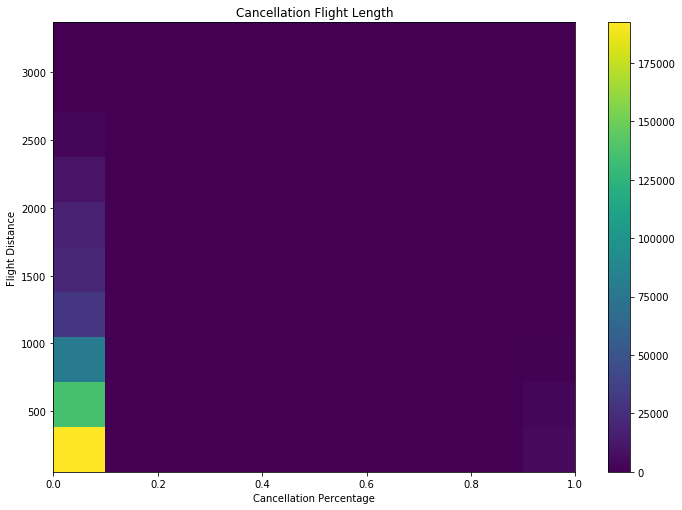

In [4]:
plt.figure(figsize=[ 11.69, 8.27])
plt.hist2d(data = df, x='Cancelled', y="Distance")
plt.xlabel('Cancellation Percentage')
plt.ylabel('Flight Distance')
plt.title('Cancellation Flight Length')
plt.colorbar();

## Cancellation Patterns

>In the Cancelled Record Data set we dig deeper into what is the cause for the flight cancellations and when does it typically occur.  Looking at the graphs included here we can see that Wednesdays are the worst day to fly and that the trend through the the month is a Bimodal pattern.

>Looks like I won't be flying on any Wednesdays that fall on the 4th, 13th, or 23rd of the month!

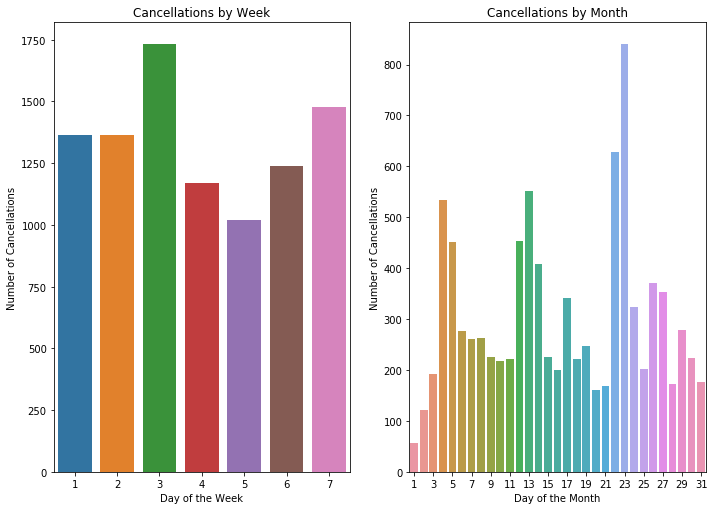

In [5]:
plt.figure(figsize=[ 11.69, 8.27])

plt.subplot(1, 2, 1)
sb.countplot(data = df_c, x="DayOfWeek")
plt.ylabel('Number of Cancellations')
plt.xlabel('Day of the Week')
plt.title('Cancellations by Week')
plt.subplot(1,2,2)
sb.countplot(data=df_c, x='DayofMonth')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Cancellations')
plt.title('Cancellations by Month')
# get the plot axes information
ax = plt.gca()
# get xtick positions
pos = ax.get_xticks().tolist()
# get xtick labels
labs = ax.get_xticklabels()
# set the xticks for every second (original) xtick
plt.xticks(pos[::2],labs[::2]);

## Carrier and Cause Analysis
> Now lets take a quick look at who the biggest culprit is over time and why they suck... sorry why the are the most likely to give you anxiety and unnecessary stress.

## Least Realiable

>Turns out that the Carrier is at fault the most, and ontop of this WN Airlines crushes its competition with letting its customers down at roughly 40% more compared to the next closest loser, US Airlines.  If I were flying tomorrow I would trust XE Airlines to hold up their end of the bargain.

Text(0.5,1,'Total Cancellation by Airline')

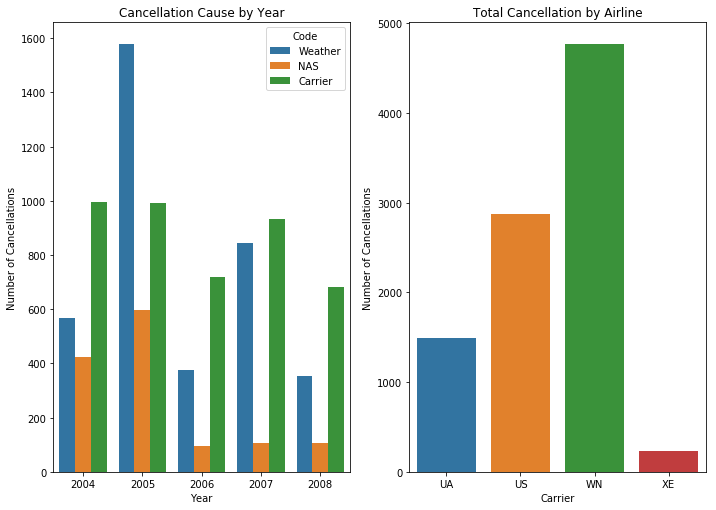

In [6]:

plt.figure(figsize=[ 11.69, 8.27])
plt.subplot(1, 2, 1)
sb.countplot(data = df_c, x = 'Year', hue = 'Code')
plt.ylabel('Number of Cancellations')
plt.title('Cancellation Cause by Year')
plt.subplot(1,2,2)
sb.countplot(data = df_c, x='Carrier')
plt.ylabel('Number of Cancellations')
plt.title('Total Cancellation by Airline')

## Comparing Cancellation codes and Airlines over time

To give WN Airlines the benefit of the doubt lets take a look at a FacetGrid to see how they compare individually over time.

Surprisingly enough our data is skewed as it looks like XE did not exist (*assuming an average of at least one cancellation in a year based on other airlines) before 2007.  WN is still the worst but based on these results if I were going to fly today I would suggest flying UA Arilines as it looks like they have cleaned up their game, especially when it concerns Carrier cancellations that they have control over.

Text(0.5,0.98,'Cancellation occur by Code and Airline')

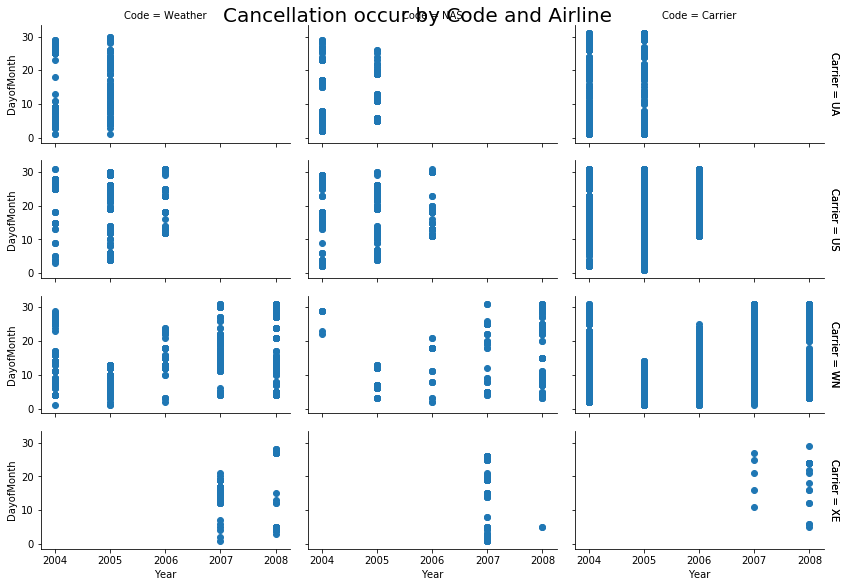

In [7]:
## Comparing Cancellation codes and Airlines over time

g = sb.FacetGrid(data = df_c, col = 'Code', row = 'Carrier', height = 8.27/4,  aspect = (11.69/3)/(8.27/4), margin_titles = True
)
g.map(plt.scatter, 'Year', 'DayofMonth').set_titles("{col_name} Code")
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Cancellation occur by Code and Airline', fontsize=20)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

## Thanks for your interest!